In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

if tf.test.gpu_device_name():
   print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
   print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [2]:
breeds_data = pd.read_csv('../../Datasets/cats/data/cats.csv')
print('Shape', breeds_data.shape)
breeds_data.head()

Shape (67145, 11)


,Unnamed: 0,id,url,type,age,gender,size,coat,breed,photos,med_photos
0,0,46744842,https://www.petfinder.com/cat/arianna-46744842...,Cat,Adult,Female,Medium,NaN,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
1,1,46717321,https://www.petfinder.com/cat/ozzy-46717321/oh...,Cat,Adult,Male,Extra Large,NaN,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
2,2,46626338,https://www.petfinder.com/cat/zena-46626338/ca...,Cat,Senior,Female,Medium,NaN,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
3,3,46620170,https://www.petfinder.com/cat/mika-46620170/ca...,Cat,Baby,Female,Small,Short,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
4,4,46582751,https://www.petfinder.com/cat/ruby-46582751/fl...,Cat,Young,Female,Medium,NaN,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...


In [3]:
missing_data = breeds_data.isnull().sum()
missing_data

Unnamed: 0        0
id                0
url               0
type              0
age               0
gender            0
size              0
coat          25133
breed             0
photos            0
med_photos        0
dtype: int64

In [4]:
import numpy as np 

# Percentage of missing values
print(missing_data.sum())
print(np.product(breeds_data.shape))
percent_missing = (missing_data.sum()/np.product(breeds_data.shape)) * 100
print(f'{percent_missing}% is missing')

25133
738595
3.402812095938911% is missing


In [5]:
# We notice that the coat column contains some NaN
# Option 1 - Dropna *
# Option 2 - Fillna

breeds_data_dropped = breeds_data.dropna()
breeds_data_dropped

,Unnamed: 0,id,url,type,age,gender,size,coat,breed,photos,med_photos
3,3,46620170,https://www.petfinder.com/cat/mika-46620170/ca...,Cat,Baby,Female,Small,Short,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
7,7,46463847,https://www.petfinder.com/cat/kingston-4646384...,Cat,Adult,Male,Medium,Short,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
11,11,46305208,https://www.petfinder.com/cat/quinn-46305208/m...,Cat,Senior,Male,Medium,Short,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
12,12,46301725,https://www.petfinder.com/cat/tazmania-fostere...,Cat,Adult,Female,Medium,Short,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
13,13,46293180,https://www.petfinder.com/cat/nutmeg-46293180/...,Cat,Young,Male,Small,Short,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
...,...,...,...,...,...,...,...,...,...,...,...
67140,70984,43781057,https://www.petfinder.com/cat/jasper-43781057/...,Cat,Baby,Male,Medium,Short,Tuxedo,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
67141,70985,43773439,https://www.petfinder.com/cat/missy-43773439/o...,Cat,Adult,Female,Medium,Short,Tuxedo,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
67142,70986,43773383,https://www.petfinder.com/cat/bandit-43773383/...,Cat,Young,Female,Large,Short,Tuxedo,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
67143,70987,43773168,https://www.petfinder.com/cat/maxy-43773168/ut...,Cat,Adult,Male,Medium,Medium,Tuxedo,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...


In [6]:
breeds_data_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42012 entries, 3 to 67144
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  42012 non-null  int64 
 1   id          42012 non-null  int64 
 2   url         42012 non-null  object
 3   type        42012 non-null  object
 4   age         42012 non-null  object
 5   gender      42012 non-null  object
 6   size        42012 non-null  object
 7   coat        42012 non-null  object
 8   breed       42012 non-null  object
 9   photos      42012 non-null  object
 10  med_photos  42012 non-null  object
dtypes: int64(2), object(9)
memory usage: 3.8+ MB


In [7]:
categorical_features = ['age', 'gender', 'size', 'coat', 'breed']

In [8]:
# We found that Hairless coat contain very little trianing examples
# drop breeds with training samples under

# could drop the breeds between 13.2 and 19.8, or use the breeds with 500 or more images
# print(breeds_data_dropped['breed'].value_counts(ascending=False, bins = 10))

breeds_data_filtered = breeds_data_dropped.groupby('coat').filter(lambda x : len(x) >= 100)

print('\nCoat with 100 or more images')
breeds_data_filtered['coat'].value_counts(ascending=False)


Coat with 100 or more images


Short     26439
Long       9306
Medium     6207
Name: coat, dtype: int64

In [10]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [11]:
cats_cat_encoded = ordinal_encoder.fit_transform(breeds_data_filtered[categorical_features])
ordinal_encoder.categories_

[array(['Adult', 'Baby', 'Senior', 'Young'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array(['Extra Large', 'Large', 'Medium', 'Small'], dtype=object),
 array(['Long', 'Medium', 'Short'], dtype=object),
 array(['Abyssinian', 'American Bobtail', 'American Curl',
        'American Shorthair', 'American Wirehair', 'Applehead Siamese',
        'Balinese', 'Bengal', 'Birman', 'Bombay', 'British Shorthair',
        'Burmese', 'Burmilla', 'Calico', 'Canadian Hairless', 'Chartreux',
        'Chausie', 'Chinchilla', 'Cornish Rex', 'Cymric', 'Devon Rex',
        'Dilute Calico', 'Dilute Tortoiseshell', 'Domestic Long Hair',
        'Domestic Medium Hair', 'Domestic Short Hair', 'Egyptian Mau',
        'Exotic Shorthair', 'Extra-Toes Cat - Hemingway Polydactyl',
        'Havana', 'Himalayan', 'Japanese Bobtail', 'Javanese', 'Korat',
        'LaPerm', 'Maine Coon', 'Manx', 'Munchkin', 'Nebelung',
        'Norwegian Forest Cat', 'Ocicat', 'Oriental Long Hair',
        'Oriental Sho

In [14]:
breeds_data_encoded = breeds_data_filtered.copy()
breeds_data_encoded[categorical_features] = cats_cat_encoded
breeds_data_encoded

,Unnamed: 0,id,url,type,age,gender,size,coat,breed,photos,med_photos
3,3,46620170,https://www.petfinder.com/cat/mika-46620170/ca...,Cat,1.0,0.0,3.0,2.0,0.0,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
7,7,46463847,https://www.petfinder.com/cat/kingston-4646384...,Cat,0.0,1.0,2.0,2.0,0.0,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
11,11,46305208,https://www.petfinder.com/cat/quinn-46305208/m...,Cat,2.0,1.0,2.0,2.0,0.0,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
12,12,46301725,https://www.petfinder.com/cat/tazmania-fostere...,Cat,0.0,0.0,2.0,2.0,0.0,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
13,13,46293180,https://www.petfinder.com/cat/nutmeg-46293180/...,Cat,3.0,1.0,3.0,2.0,0.0,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
...,...,...,...,...,...,...,...,...,...,...,...
67140,70984,43781057,https://www.petfinder.com/cat/jasper-43781057/...,Cat,1.0,1.0,2.0,2.0,65.0,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
67141,70985,43773439,https://www.petfinder.com/cat/missy-43773439/o...,Cat,0.0,0.0,2.0,2.0,65.0,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
67142,70986,43773383,https://www.petfinder.com/cat/bandit-43773383/...,Cat,3.0,0.0,1.0,2.0,65.0,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
67143,70987,43773168,https://www.petfinder.com/cat/maxy-43773168/ut...,Cat,0.0,1.0,2.0,1.0,65.0,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...


In [16]:
breeds_data_encoded.describe()

,Unnamed: 0,id,age,gender,size,coat,breed
count,41952.000000,4.195200e+04,41952.000000,41952.000000,41952.000000,41952.000000,41952.000000
mean,36988.237009,4.030391e+07,1.147359,0.391972,2.042024,1.408395,34.466867
std,21152.674312,6.995306e+06,1.139221,0.488196,0.622933,0.827813,19.747649
min,3.000000,1.527494e+07,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17693.250000,3.601639e+07,0.000000,0.000000,2.000000,1.000000,21.000000
50%,38974.500000,4.331835e+07,1.000000,0.000000,2.000000,2.000000,35.000000
75%,55802.750000,4.592163e+07,2.000000,1.000000,2.000000,2.000000,51.000000
max,70988.000000,4.680663e+07,3.000000,1.000000,3.000000,2.000000,66.000000


In [17]:
for i in range(4,9):
    print(breeds_data_encoded.iloc[:, i].value_counts())
    print()

1.0    15462
0.0    14965
3.0     9622
2.0     1903
Name: age, dtype: int64

0.0    25508
1.0    16444
Name: gender, dtype: int64

2.0    27264
3.0     8503
1.0     5630
0.0      555
Name: size, dtype: int64

2.0    26439
0.0     9306
1.0     6207
Name: coat, dtype: int64

44.0    3101
3.0     2311
21.0    2256
22.0    2131
23.0    1944
        ... 
19.0      11
12.0       6
17.0       3
66.0       1
14.0       1
Name: breed, Length: 67, dtype: int64



In [18]:
def get_cat_string(cat, value):
    if(cat == 'age'):
        return ordinal_encoder.categories_[0][int(value)]
    elif(cat == 'gender'):
        return ordinal_encoder.categories_[1][int(value)]
    elif(cat == 'size'):
        return ordinal_encoder.categories_[2][int(value)]
    elif(cat == 'coat'):
        return ordinal_encoder.categories_[3][int(value)]
    elif(cat == 'breed'):
        return ordinal_encoder.categories_[4][int(value)]

In [19]:
def get_corr_map(data):
    corr = data.corr()
    plt.figure(figsize=(8, 8), dpi=100, facecolor='w', edgecolor='k')
    colormap = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(colormap)
    plt.title('Correlation Map')
    plt.show()
    return corr

In [21]:
breeds_data_encoded['coat'].value_counts()

2.0    26439
0.0     9306
1.0     6207
Name: coat, dtype: int64

In [18]:
# We found that some breeds contain very little trianing examples
# drop breeds with training samples under

# could drop the breeds between 13.2 and 19.8, or use the breeds with 500 or more images
#breed_col = 8
#print(breeds_data_encoded.iloc[:,breed_col].value_counts(ascending=False, bins = 10))

#breeds_data = breeds_data_encoded.groupby('breed').filter(lambda x : len(x) >= 500)

#print('\n\nBreeds with 500 or more images')
#breeds_data['breed'].value_counts(ascending=False)

In [22]:
breeds_data_encoded

,Unnamed: 0,id,url,type,age,gender,size,coat,breed,photos,med_photos
3,3,46620170,https://www.petfinder.com/cat/mika-46620170/ca...,Cat,1.0,0.0,3.0,2.0,0.0,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
7,7,46463847,https://www.petfinder.com/cat/kingston-4646384...,Cat,0.0,1.0,2.0,2.0,0.0,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
11,11,46305208,https://www.petfinder.com/cat/quinn-46305208/m...,Cat,2.0,1.0,2.0,2.0,0.0,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
12,12,46301725,https://www.petfinder.com/cat/tazmania-fostere...,Cat,0.0,0.0,2.0,2.0,0.0,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
13,13,46293180,https://www.petfinder.com/cat/nutmeg-46293180/...,Cat,3.0,1.0,3.0,2.0,0.0,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
...,...,...,...,...,...,...,...,...,...,...,...
67140,70984,43781057,https://www.petfinder.com/cat/jasper-43781057/...,Cat,1.0,1.0,2.0,2.0,65.0,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
67141,70985,43773439,https://www.petfinder.com/cat/missy-43773439/o...,Cat,0.0,0.0,2.0,2.0,65.0,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
67142,70986,43773383,https://www.petfinder.com/cat/bandit-43773383/...,Cat,3.0,0.0,1.0,2.0,65.0,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
67143,70987,43773168,https://www.petfinder.com/cat/maxy-43773168/ut...,Cat,0.0,1.0,2.0,1.0,65.0,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...


In [23]:
# Find related images from med_photos column
import re
from os import walk
#from tqdm import trange

pattern = r"\/(\d+)\/"

def find_file(breed, name):
    _, _, files = next(walk(f'../../Datasets/cats/images/{breed}'))
    for file in files:
        #print(file, breed, name)
        if(name in file):
            return file
    return None

def match_file(df):
    result = []
    for i, row in df.iterrows():
        breed = get_cat_string('breed', row['breed'])
        photo = find_file(breed, re.findall(r"\/(\d+)\/", row['med_photos'])[0])
        #print(photo)
        result.append(f'{breed}/{photo}')
        
    return pd.Series(result, index=df.index)

In [24]:
# Drop columns/rows and Parse photos
# We use med_photos
breeds_data_final = breeds_data_encoded.iloc[:, 4:9]
breeds_data_final['image'] = match_file(breeds_data_encoded)    # Adding new column - image path
breeds_data_final = breeds_data_final.drop(breeds_data_final[(breeds_data_final['image'].str.contains('None'))].index)     # Drop None images, there are 13
breeds_data_final

,age,gender,size,coat,breed,image
3,1.0,0.0,3.0,2.0,0.0,Abyssinian/46620170_3.jpg
7,0.0,1.0,2.0,2.0,0.0,Abyssinian/46463847_8.jpg
11,2.0,1.0,2.0,2.0,0.0,Abyssinian/46305208_12.jpg
12,0.0,0.0,2.0,2.0,0.0,Abyssinian/46301725_13.jpg
13,3.0,1.0,3.0,2.0,0.0,Abyssinian/46293180_14.jpg
...,...,...,...,...,...,...
67140,1.0,1.0,2.0,2.0,65.0,Tuxedo/43781057_7295.jpg
67141,0.0,0.0,2.0,2.0,65.0,Tuxedo/43773439_7304.jpg
67142,3.0,0.0,1.0,2.0,65.0,Tuxedo/43773383_7305.jpg
67143,0.0,1.0,2.0,1.0,65.0,Tuxedo/43773168_7306.jpg


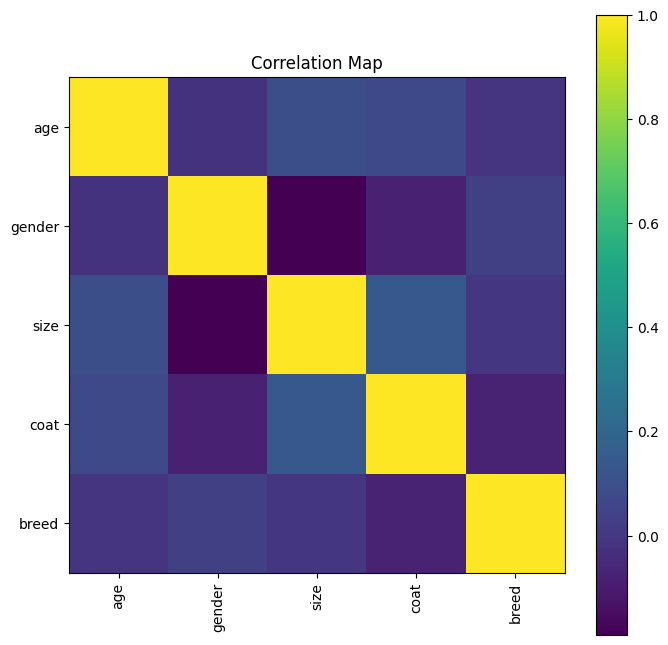

,age,gender,size,coat,breed
age,1.000000,-0.018718,0.095492,0.071828,-0.006869
gender,-0.018718,1.000000,-0.190893,-0.081781,0.035960
size,0.095492,-0.190893,1.000000,0.137256,-0.002803
coat,0.071828,-0.081781,0.137256,1.000000,-0.070799
breed,-0.006869,0.035960,-0.002803,-0.070799,1.000000


In [25]:
get_corr_map(breeds_data_final.iloc[:, :5])

In [22]:
# PROBLEM HERE (Solved)
# change data to represent all 26 breeds instead of the 66

#print(breeds_data_final.iloc[:, 4].unique())
#print(len(breeds_data_final.iloc[:, 4].unique()))



[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25.]
26


In [26]:
# store df
import os

working_dir = 'working_cats/data/'
datasets_dir = '../../Datasets/cats/data'
data_file = 'breeds_data_final.pkl'

if (os.path.isdir(working_dir) == False):
    os.mkdir(working_dir)
    
breeds_data_final.to_pickle(os.path.join(working_dir, data_file))
breeds_data_final.to_pickle(os.path.join(datasets_dir, data_file))

# --Previous Works Start Here--

## Test if None images
for path in data['image']:
    if 'None' in path:
        print(path)

# download images from url link
import requests
import shutil

def down_img(img_url, folder, fn_id):
    ## Set up the image URL and filename
    #img_url = "https://cdn.pixabay.com/photo/2020/02/06/09/39/summer-4823612_960_720.jpg"
    work_dir = 'working_cats/images/'+folder
    filename = work_dir+fn_id
    if (os.path.isdir(work_dir) == False):
        os.mkdir(work_dir)
    
    # Open the url image, set stream to True, this will return the stream content.
    r = requests.get(img_url, stream = True)

    # Check if the image was retrieved successfully
    if r.status_code == 200:
        # Set decode_content value to True, otherwise the downloaded image file's size will be zero.
        r.raw.decode_content = True

        # Open a local file with wb ( write binary ) permission.
        with open(filename,'wb') as f:
            shutil.copyfileobj(r.raw, f)

        print('Image sucessfully Downloaded: ',filename)
    else:
        print('Image Couldn\'t be retreived')

# import re

# download images from df and store in working folders
#print(breeds_data.shape[0])
fol = ['train/','val/','test/']
deli = ",","[","'"
reg = '|'.join(map(re.escape, deli))
#print(breeds_data['med_photos'].iloc[1])

#split into train, test and val sets
train, val, test = np.split(breeds_data.sample(frac=1, random_state=42),\
                            [int(.6*len(breeds_data)), int(.8*len(breeds_data))])

sets = [train, val, test]

for se,data in enumerate(sets):
    for k in range(data.shape[0]):
        
        # get url string from df
        urls = data['med_photos'].iloc[k]
        url = re.split(reg,urls)[2]
        #print(url)

        #filename
        fn_id = data['id'].iloc[k]
        fn_id = str(fn_id) + '.png'
        # test
        down_img(url, fol[se], fn_id)
        